In [1]:
from random import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Untuk Membaca data dari host file
file_path = "../Progress_Proposal_THT/tht_transform_featureranking_sfs.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,pilek,suara_serak,nyeri_membuka_mulut,vertigo,hidung_nyeri,blkng_hidng_ganjal,nyeri_telan_tenggorokan,batuk,nyeri_tlinga,gangguan_dengar,...,mata_juling,pipi_bengkak,usia,mual,muntah,telinga,hidung,tenggorok,leher,hasil_diagn
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,tonsilitsakut
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,tonsilitsakut
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,4,0,tonsilitsakut
3,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,0,0,0,6,0,tonsilitsakut
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,tonsilitsakut


In [4]:
df["hasil_diagn"].value_counts()

hasil_diagn
laringitisakut            33
tonsilitsakut             32
rhinitis_alergi           32
serumen_obsturans         32
faringitis_akut           31
ruptur_membran_timpani    30
othematome                30
parotitis                 30
laringofaringealreflux    30
karsinoma_nasofaring      30
korpus_alenium_hidung     30
prebiakusis               30
barotrauma                30
bppv                      30
otisis_media_kronis       30
rhinitis_akut             30
meniere_disease           30
vestibulitis              30
perichondritis            30
sinusitis                 30
otisis_eksterna           30
otisis_media_akut         30
karsinoma_laring          30
Name: count, dtype: int64

In [5]:
df["hasil_diagn"].value_counts().sum()

700

In [6]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [7]:
#VISUALISASI
vis_df = pd.read_excel(file_path)
vis_df.columns = ['pilek', 'suara serak', 'nyeri membuka mulut', 'vertigo', 'hidung nyeri', 
                  'belakang hidung ganjal', 'nyeri telan tenggorokan', 'batuk', 'nyeri telinga', 'gangguan dengar', 'cairan telinga', 'leher bengkak',
                  'mata gatal', 'telinga bengkak', 'hidung bengkak', 
                  'tenggorokan kering', 'kepala berat', 'bersin',
                  'mimisan',
                  'hidung_keluar_ingus', 'kekentalan_ingus', 'sesak_nafas', 'berdehem',
                  'mulut_kering', 'mata_juling', 'pipi_bengkak', 
                  'usia','mual', 'muntah', 'telinga', 'hidung', 'tenggorok', 'leher',
                  'Diagnosis']

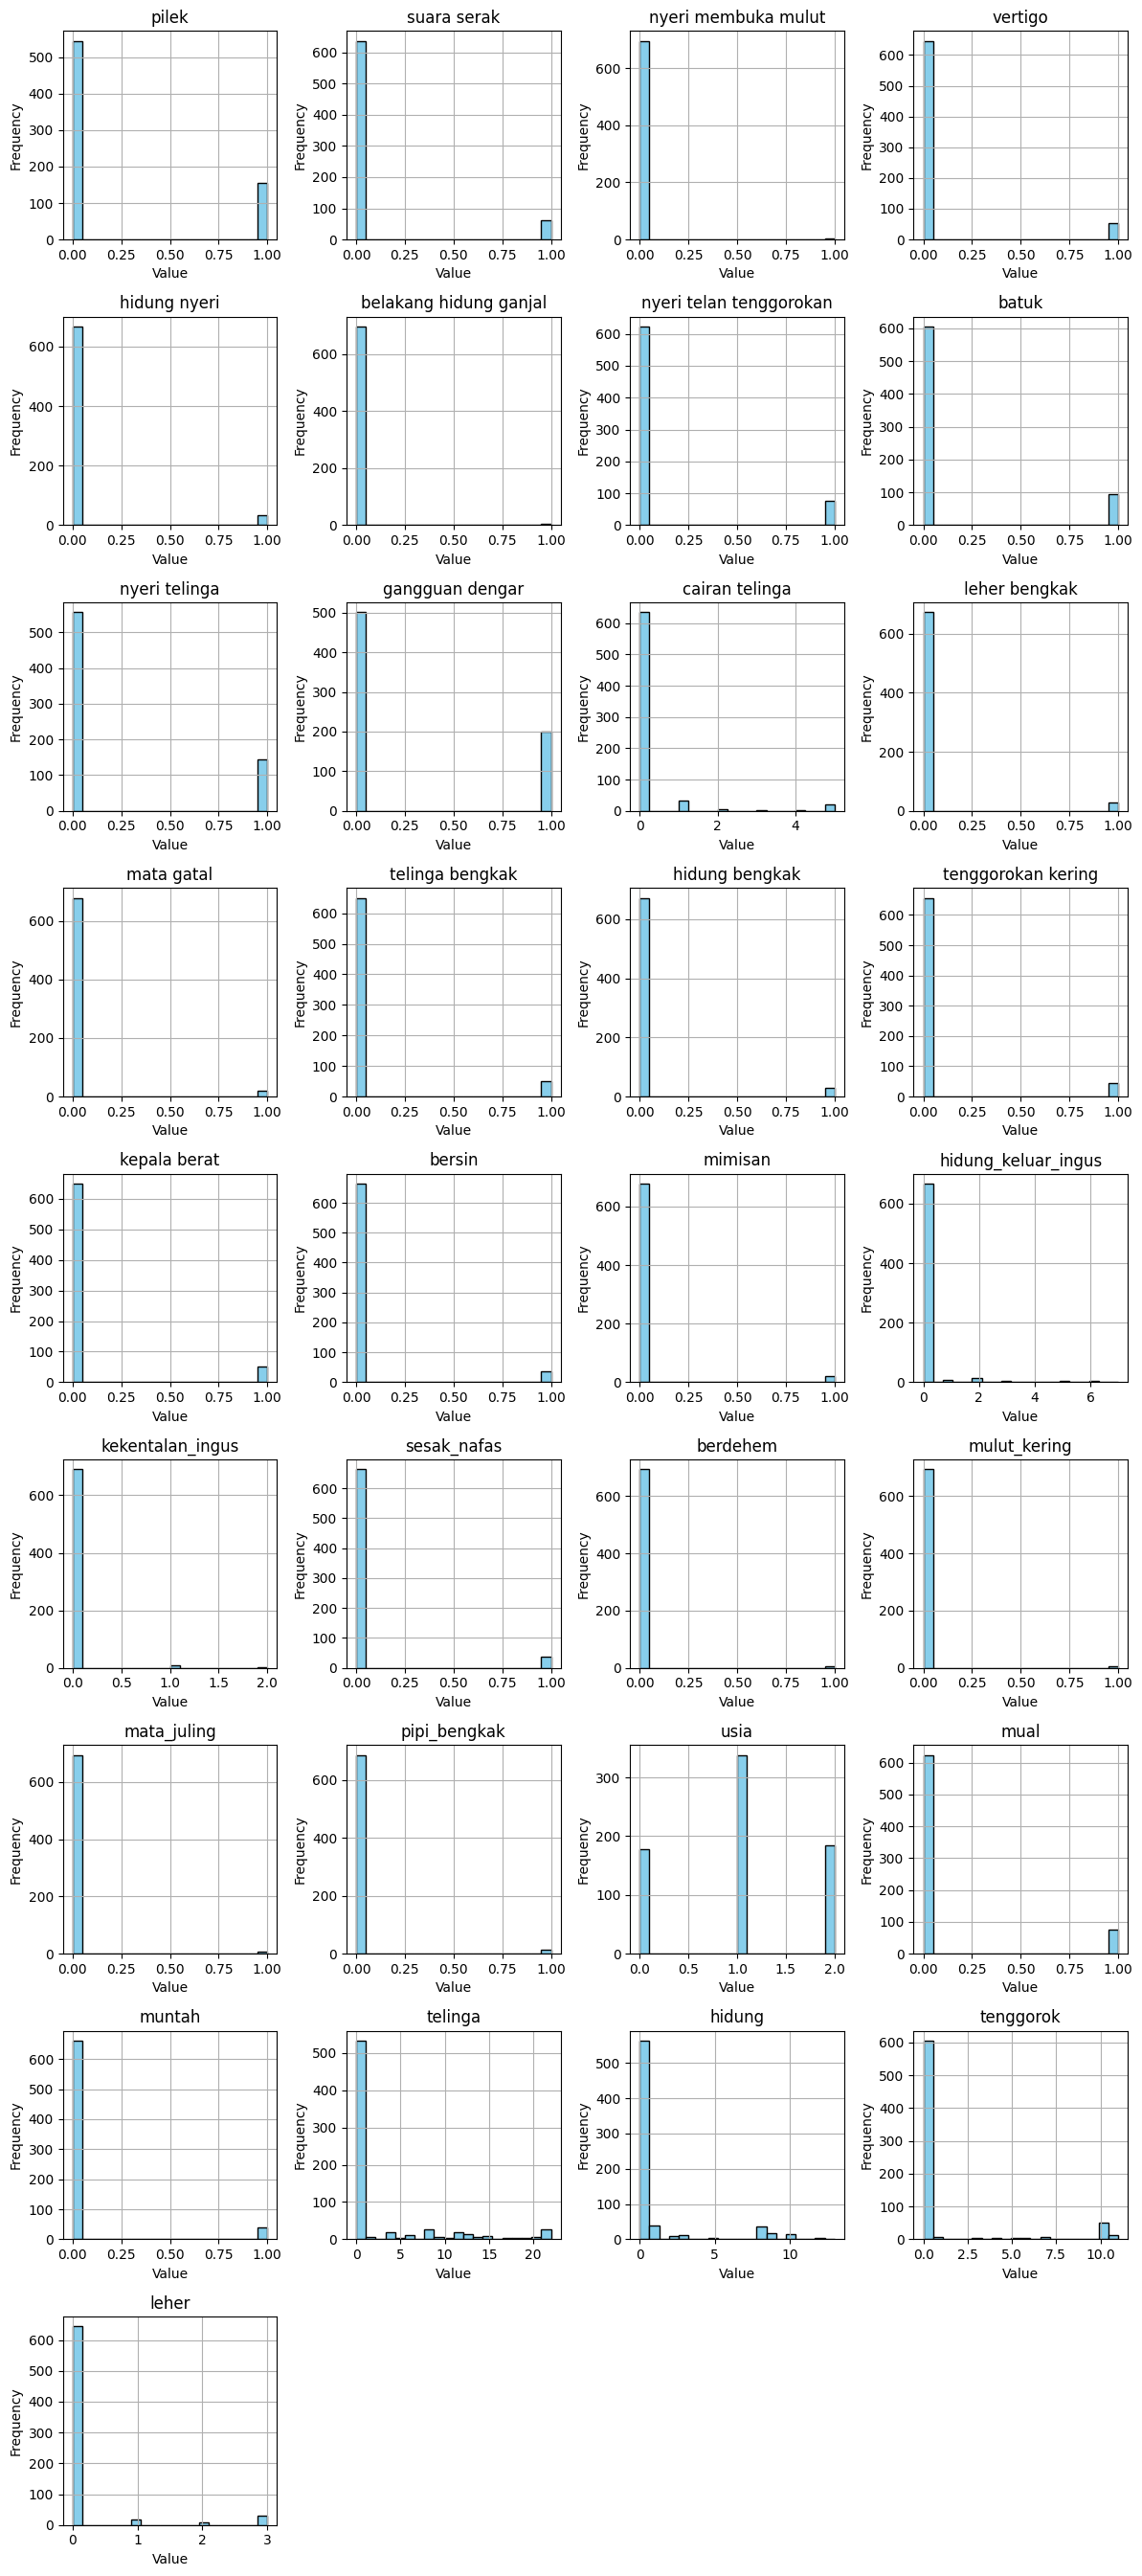

In [8]:
# List of feature columns
feature_columns = vis_df.columns[:-1]  # tidak memakai kolom terakhir karena diagnosis

# Calculate the number of rows and columns for subplots
num_features = len(feature_columns)
num_rows = (num_features + 3) // 4  # Calculate the number of rows (ceil(num_features / 4))
num_cols = min(num_features, 4)     # Number of columns is at most 4

# Plotting the distribution of each feature
plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust the subplot layout as per your number of features
    vis_df[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
missing_values = df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

# Check if there are any missing values in the DataFrame
if missing_values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Columns with missing values:
[]
There are no missing values in the DataFrame.


In [10]:
#1X SAJA
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels into numeric values
df['hasil_diagn_encoded'] = label_encoder.fit_transform(df['hasil_diagn'])

# Check the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

# Now you have a new column 'hasil_diagn_encoded' containing numeric representations of the labels
# You can drop the original 'hasil_diagn' column if you don't need it anymore
df.drop(columns=['hasil_diagn'], inplace=True)

Label Mapping: {'barotrauma': 0, 'bppv': 1, 'faringitis_akut': 2, 'karsinoma_laring': 3, 'karsinoma_nasofaring': 4, 'korpus_alenium_hidung': 5, 'laringitisakut': 6, 'laringofaringealreflux': 7, 'meniere_disease': 8, 'othematome': 9, 'otisis_eksterna': 10, 'otisis_media_akut': 11, 'otisis_media_kronis': 12, 'parotitis': 13, 'perichondritis': 14, 'prebiakusis': 15, 'rhinitis_akut': 16, 'rhinitis_alergi': 17, 'ruptur_membran_timpani': 18, 'serumen_obsturans': 19, 'sinusitis': 20, 'tonsilitsakut': 21, 'vestibulitis': 22}


In [11]:
for key, values in label_mapping.items():
    print(key)

barotrauma
bppv
faringitis_akut
karsinoma_laring
karsinoma_nasofaring
korpus_alenium_hidung
laringitisakut
laringofaringealreflux
meniere_disease
othematome
otisis_eksterna
otisis_media_akut
otisis_media_kronis
parotitis
perichondritis
prebiakusis
rhinitis_akut
rhinitis_alergi
ruptur_membran_timpani
serumen_obsturans
sinusitis
tonsilitsakut
vestibulitis


In [12]:
# Assuming the last column is the label/target column
X = df.drop("hasil_diagn_encoded", axis = 1)  # Features
y = df['hasil_diagn_encoded']   # Labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #1234
)

In [13]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [14]:
# Splitting the data into training and testing sets while maintaining the same proportion of classes
StratX_train, StratX_test, Straty_train, Straty_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
StratX_train3, StratX_test3, Straty_train3, Straty_test3 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
StratX_train4, StratX_test4, Straty_train4, Straty_test4 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [15]:
X_test

,pilek,suara_serak,nyeri_membuka_mulut,vertigo,hidung_nyeri,blkng_hidng_ganjal,nyeri_telan_tenggorokan,batuk,nyeri_tlinga,gangguan_dengar,...,mulut_kering,mata_juling,pipi_bengkak,usia,mual,muntah,telinga,hidung,tenggorok,leher
158,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,4,0,0,0
500,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
396,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
155,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,4,0,0,0
321,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,15,0,0,0
281,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,9,0,0


In [16]:
X2 = df.drop("hasil_diagn_encoded", axis = 1).values  # Features ke np array
y2 = df['hasil_diagn_encoded'].values   # Labels ke np array

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42 #1234
)

In [17]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2, y2, test_size=0.3, random_state=42 #1234
)

In [18]:
print("Data Trainning : ", X_train.head())

print("Data Testing :", X_test.head())

Data Trainning :       pilek  suara_serak  nyeri_membuka_mulut  vertigo  hidung_nyeri  \
82       1            0                    0        0             0   
51       0            1                    0        0             0   
220      1            0                    0        0             0   
669      0            0                    0        0             0   
545      1            0                    0        0             0   

     blkng_hidng_ganjal  nyeri_telan_tenggorokan  batuk  nyeri_tlinga  \
82                    0                        0      0             0   
51                    0                        1      0             0   
220                   0                        0      0             0   
669                   0                        0      0             0   
545                   0                        0      0             0   

     gangguan_dengar  ...  mulut_kering  mata_juling  pipi_bengkak  usia  \
82                 0  ...             0 

In [19]:
from sklearn.ensemble import RandomForestClassifier
#'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 512
forest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9214285714285714

In [20]:
forest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest3.fit(X_train3, y_train3)
forest3.score(X_test3, y_test3)

0.8666666666666667

In [21]:
forest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest4.fit(X_train4, y_train4)
forest4.score(X_test4, y_test4)

0.8714285714285714

In [22]:
Stratforest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt',  oob_score=True)
Stratforest.fit(StratX_train, Straty_train)
Stratforest.score(StratX_test, Straty_test)

0.85

In [23]:
Stratforest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt', oob_score=True)
Stratforest3.fit(StratX_train3, Straty_train3)
Stratforest3.score(StratX_test3, Straty_test3)

0.8333333333333334

In [24]:
Stratforest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt', oob_score=True)
Stratforest4.fit(StratX_train4, Straty_train4)
Stratforest4.score(StratX_test4, Straty_test4)

0.825

In [25]:
oob_score = Stratforest.oob_score_
print("Out-of-Bag Score:", oob_score)

Out-of-Bag Score: 0.8767857142857143


In [26]:
oob_score = Stratforest3.oob_score_
print("Out-of-Bag Score:", oob_score)

Out-of-Bag Score: 0.8714285714285714


In [27]:
y_pred = Stratforest.predict(StratX_test)
print(y_pred)

[ 7 16  8 10 22 17  1 20  1  0 22 20 18  1 19 11  9 21  5  1 19 10  2 13
 18 18 15  6 18  2 14  6  3 11  6 12 11 14  5  8  3  9 19 20  6 21  2  3
 17  5 11 16 14 20  5 16 12  6 18 20  8 11  1 13  9  9 12 12  1  8 22 12
  5  1 16  8  8 18  1 21 10 18 16 22 10  1 12 21  2  3  6  2 16 15  7 15
 22  4  5 12 13  9  8 14 15  2 15  0 18 18 17  9 21 15 14  3 20 17 13 13
 12  2 13 18  4  4  3 17 14  4 14  4 17 21  2 14 22 21  6 11]


In [28]:
y_pred3 = Stratforest3.predict(StratX_test3)

In [29]:
y_pred4 = Stratforest4.predict(StratX_test4)

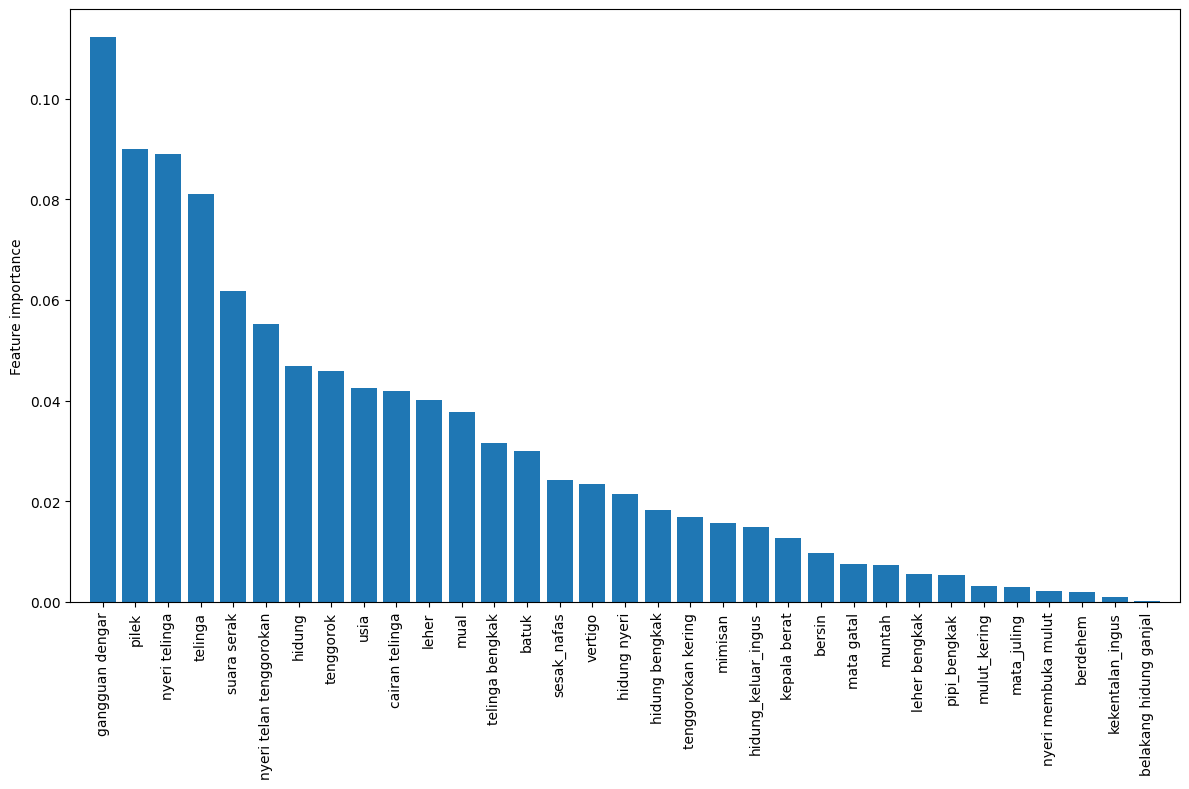

In [30]:
importances = forest.feature_importances_ #mendapatkan prosentasi feature terpenting

plt.figure(figsize=(12, 8))
indices = np.argsort(importances)[::-1] #ascending atas ke bawah 1# tertinggi -> last# terendah
plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = vis_df.columns[:-1]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=900)
plt.show()

In [31]:
def confusion_matrix(y_true, y_pred, labels):
    matrix = [[0 for _ in range(len(labels))] for _ in range(len(labels))]
    
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix

def plot_confusion_matrix(matrix, labels):
    print("\nConfusion Matrix:")
    for row in matrix:
        print(row)
    
    print("\nConfusion Matrix (Normalized):")
    total_samples = sum(sum(row) for row in matrix)
    for i, row in enumerate(matrix):
        row_total = sum(row)
        normalized_row = ["{:.2f}".format(val/row_total) if row_total != 0 else "0.00" for val in row]
        print(normalized_row)
    
    print("\nPlotting Confusion Matrix:")
    for i, row in enumerate(matrix):
        for j, val in enumerate(row):
            print(val, end=" ")
        print()

# Calculate confusion matrix
matrix = confusion_matrix(Straty_test3, y_pred3, np.unique(Straty_test3))

# Plot confusion matrix
plot_confusion_matrix(matrix, np.unique(Straty_test3))



Confusion Matrix:
[4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0]


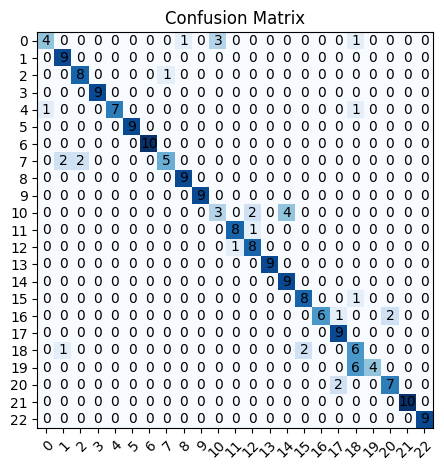

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)))
    
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix

def plot_confusion_matrix(matrix, labels):
    fig, ax = plt.subplots()
    
    # Create heatmap
    im = ax.imshow(matrix, cmap='Blues')
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, "{:.0f}".format(matrix[i, j]), ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

# Example usage:
# Calculate confusion matrix
matrix = confusion_matrix(Straty_test3, y_pred3, np.unique(Straty_test3))

# Plot confusion matrix
plot_confusion_matrix(matrix, np.unique(Straty_test3))

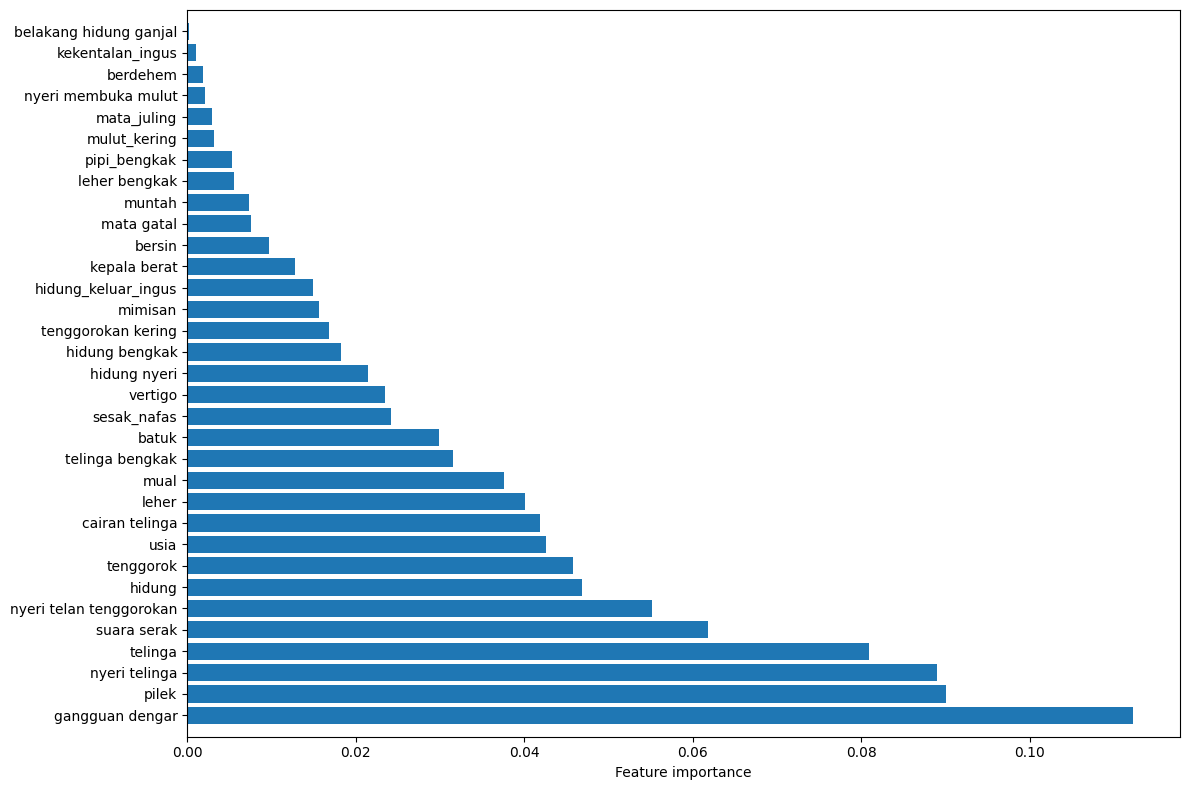

In [33]:
importances3 = Stratforest3.feature_importances_  # Get feature importances

plt.figure(figsize=(12, 8))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]  # Highest -> Last, Lowest -> First

plt.xlabel('Feature importance')  # Change to xlabel as it's now the feature importance
plt.barh(range(StratX_train3.shape[1]),  # Change to barh for horizontal bar plot
         importances[indices],
         align='center')

feat_labels = vis_df.columns[:-1]
plt.yticks(range(StratX_train3.shape[1]),  # Change to yticks
           feat_labels[indices], rotation=0)  # Rotate labels horizontally

plt.ylim([-1, StratX_train3.shape[1]])  # Change to ylim for y-axis limit

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=600)
plt.show()


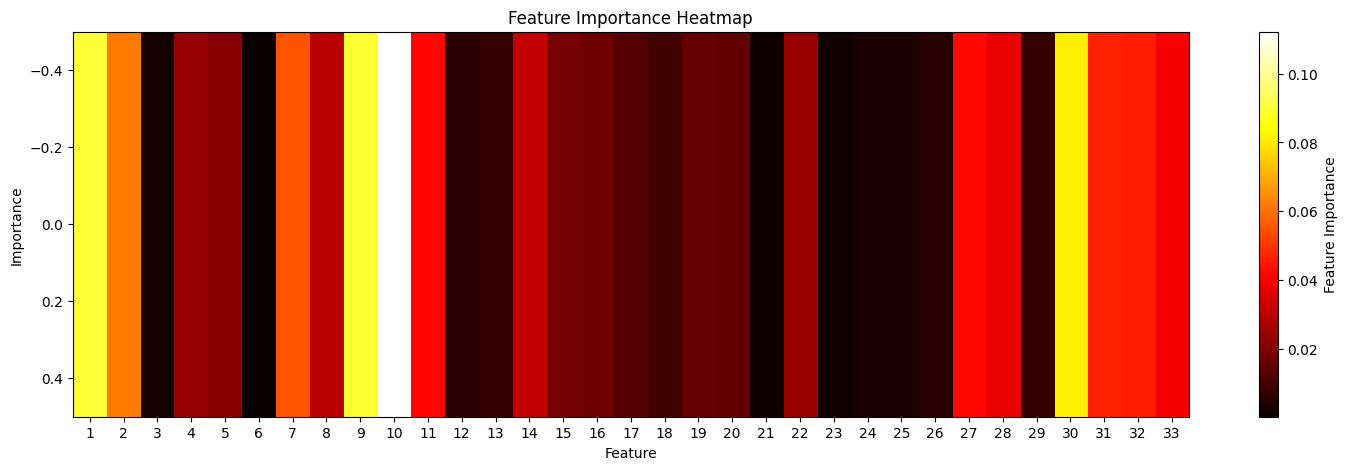

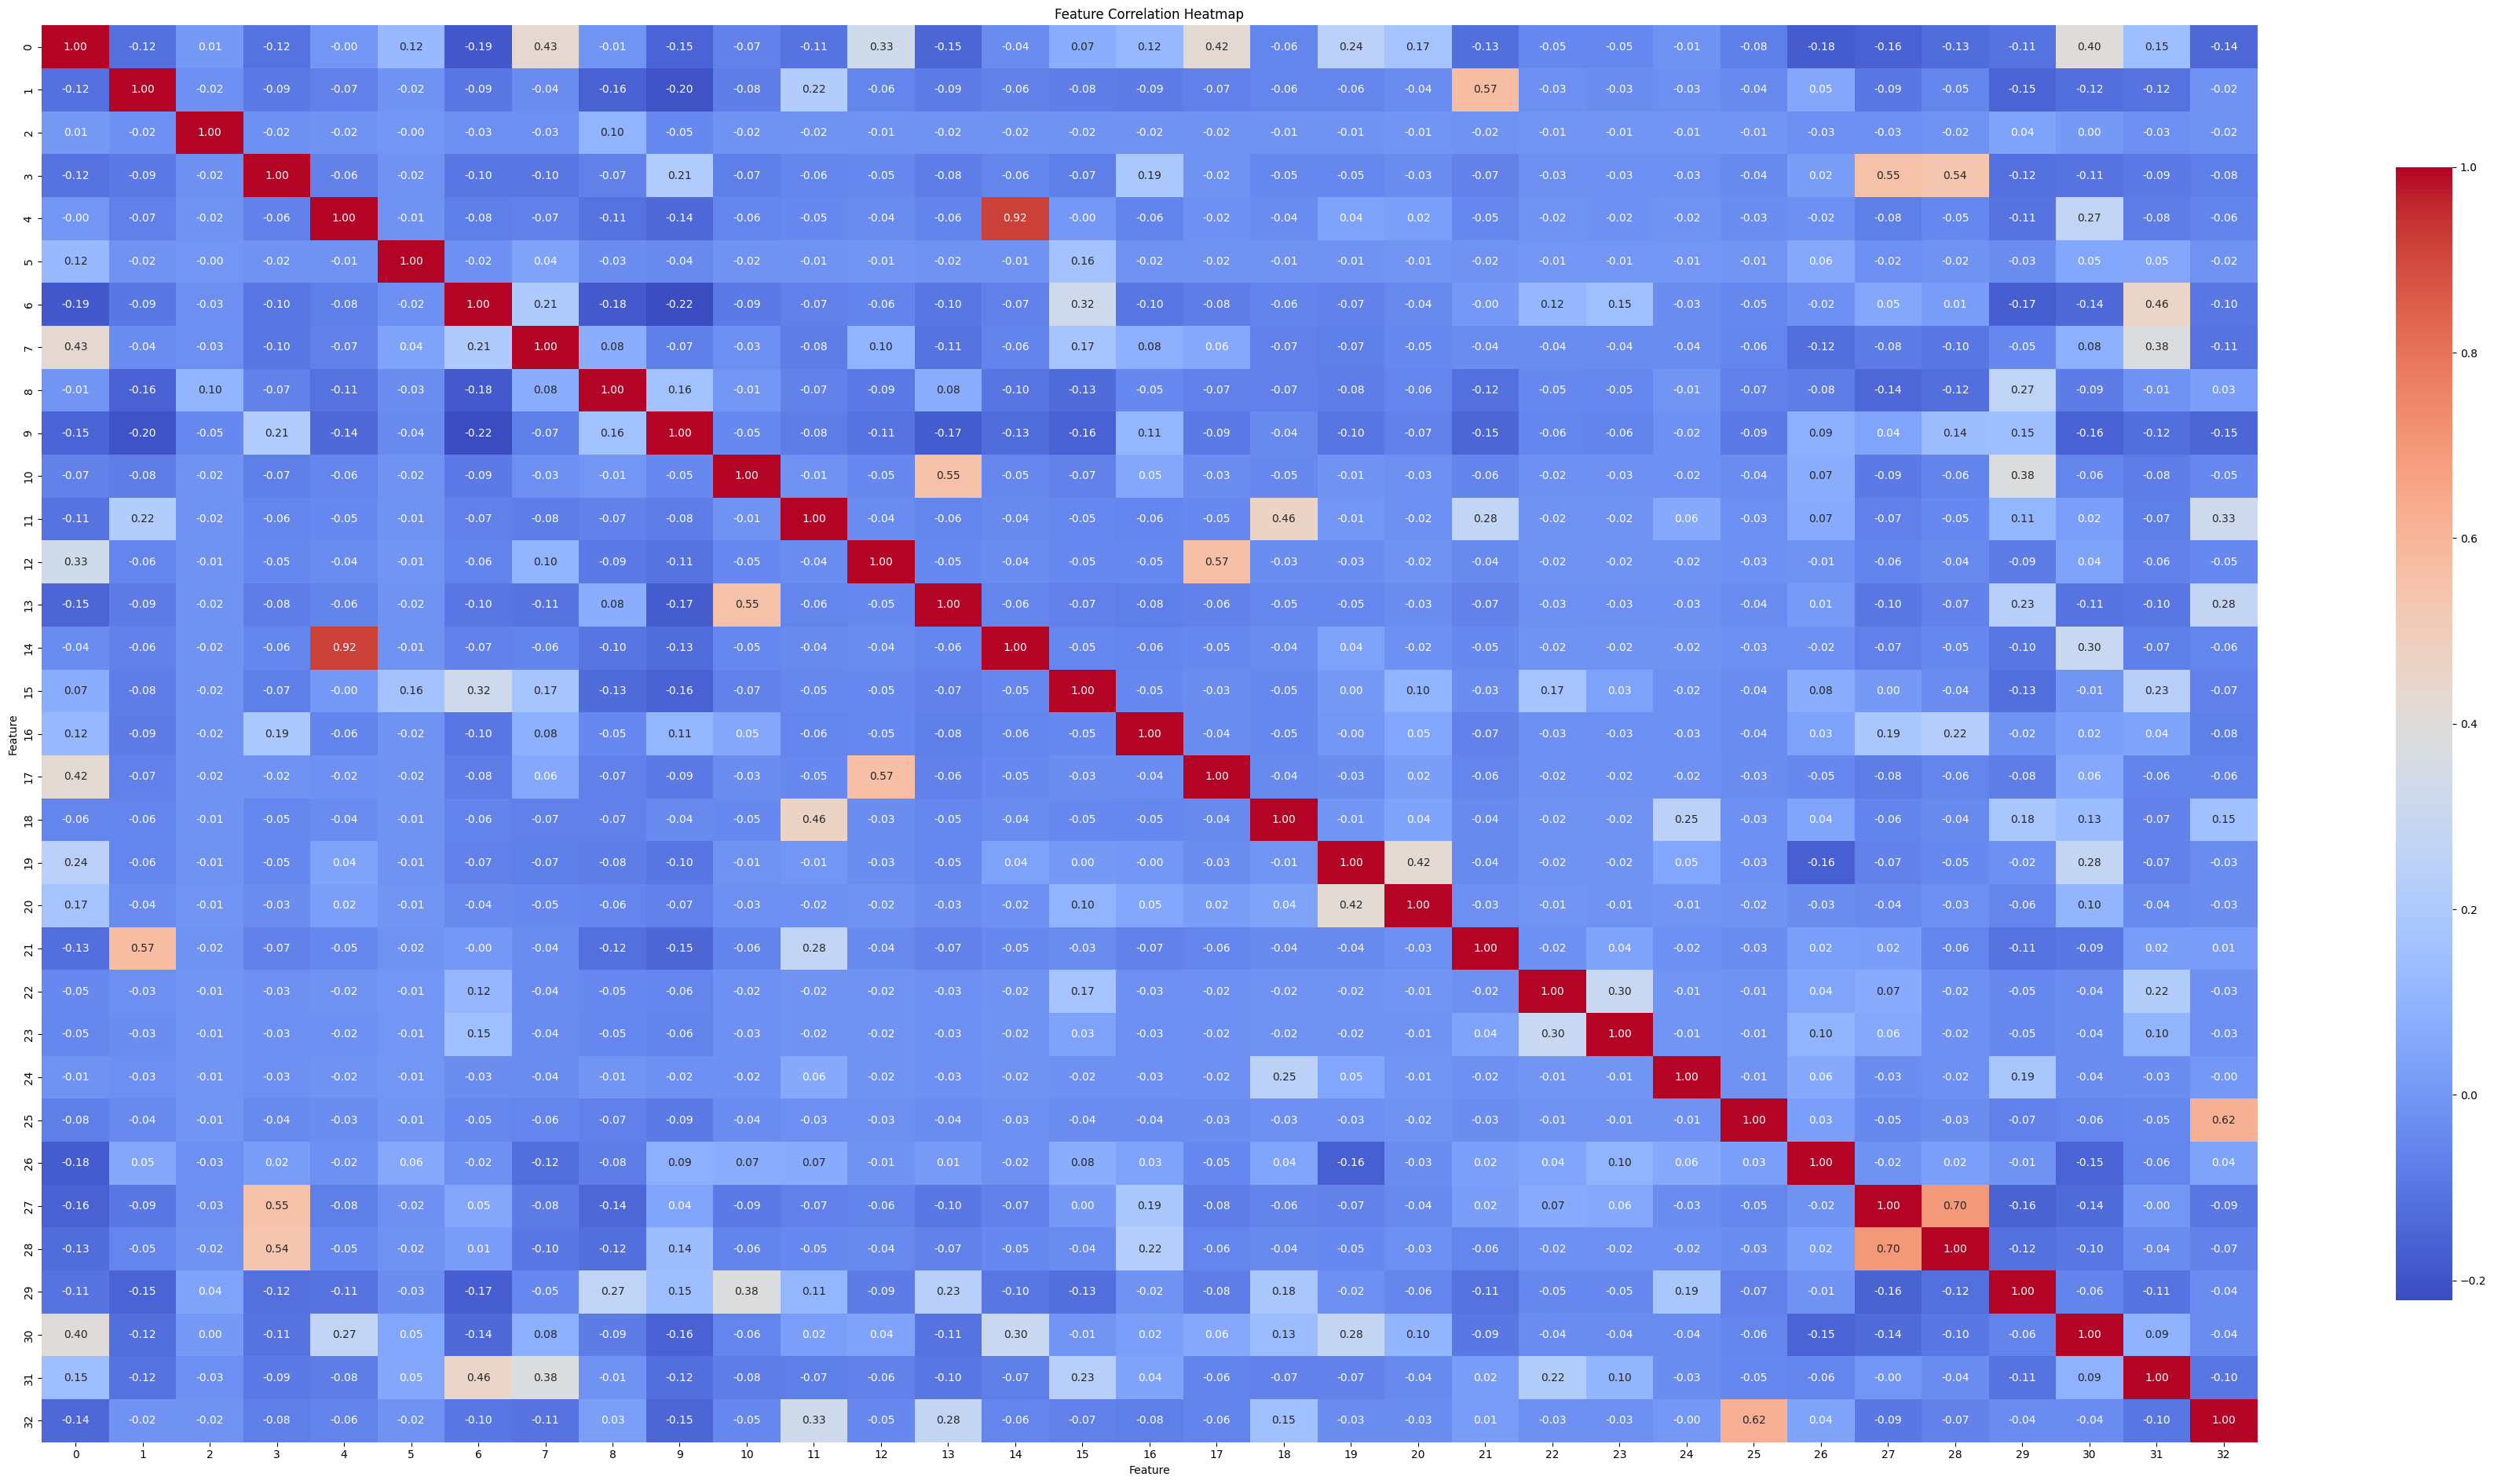

In [34]:
# Reshaping importances for heatmap
importances_heatmap = importances.reshape(1, -1)

indices = np.argsort(importances_heatmap)[::-1]  # Highest -> Last, Lowest -> First
# Plotting heatmap
plt.figure(figsize=(18, 5))
plt.imshow(importances_heatmap, cmap='hot', aspect='auto')
plt.colorbar(label='Feature Importance')
plt.xticks(ticks=np.arange(len(importances)), labels=np.arange(len(importances))+1)
# plt.xticks(range(X_train.shape[1]), 
#            feat_labels[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Heatmap')
plt.show()

correlation_matrix = np.corrcoef(X, rowvar=False)

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(36, 19))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

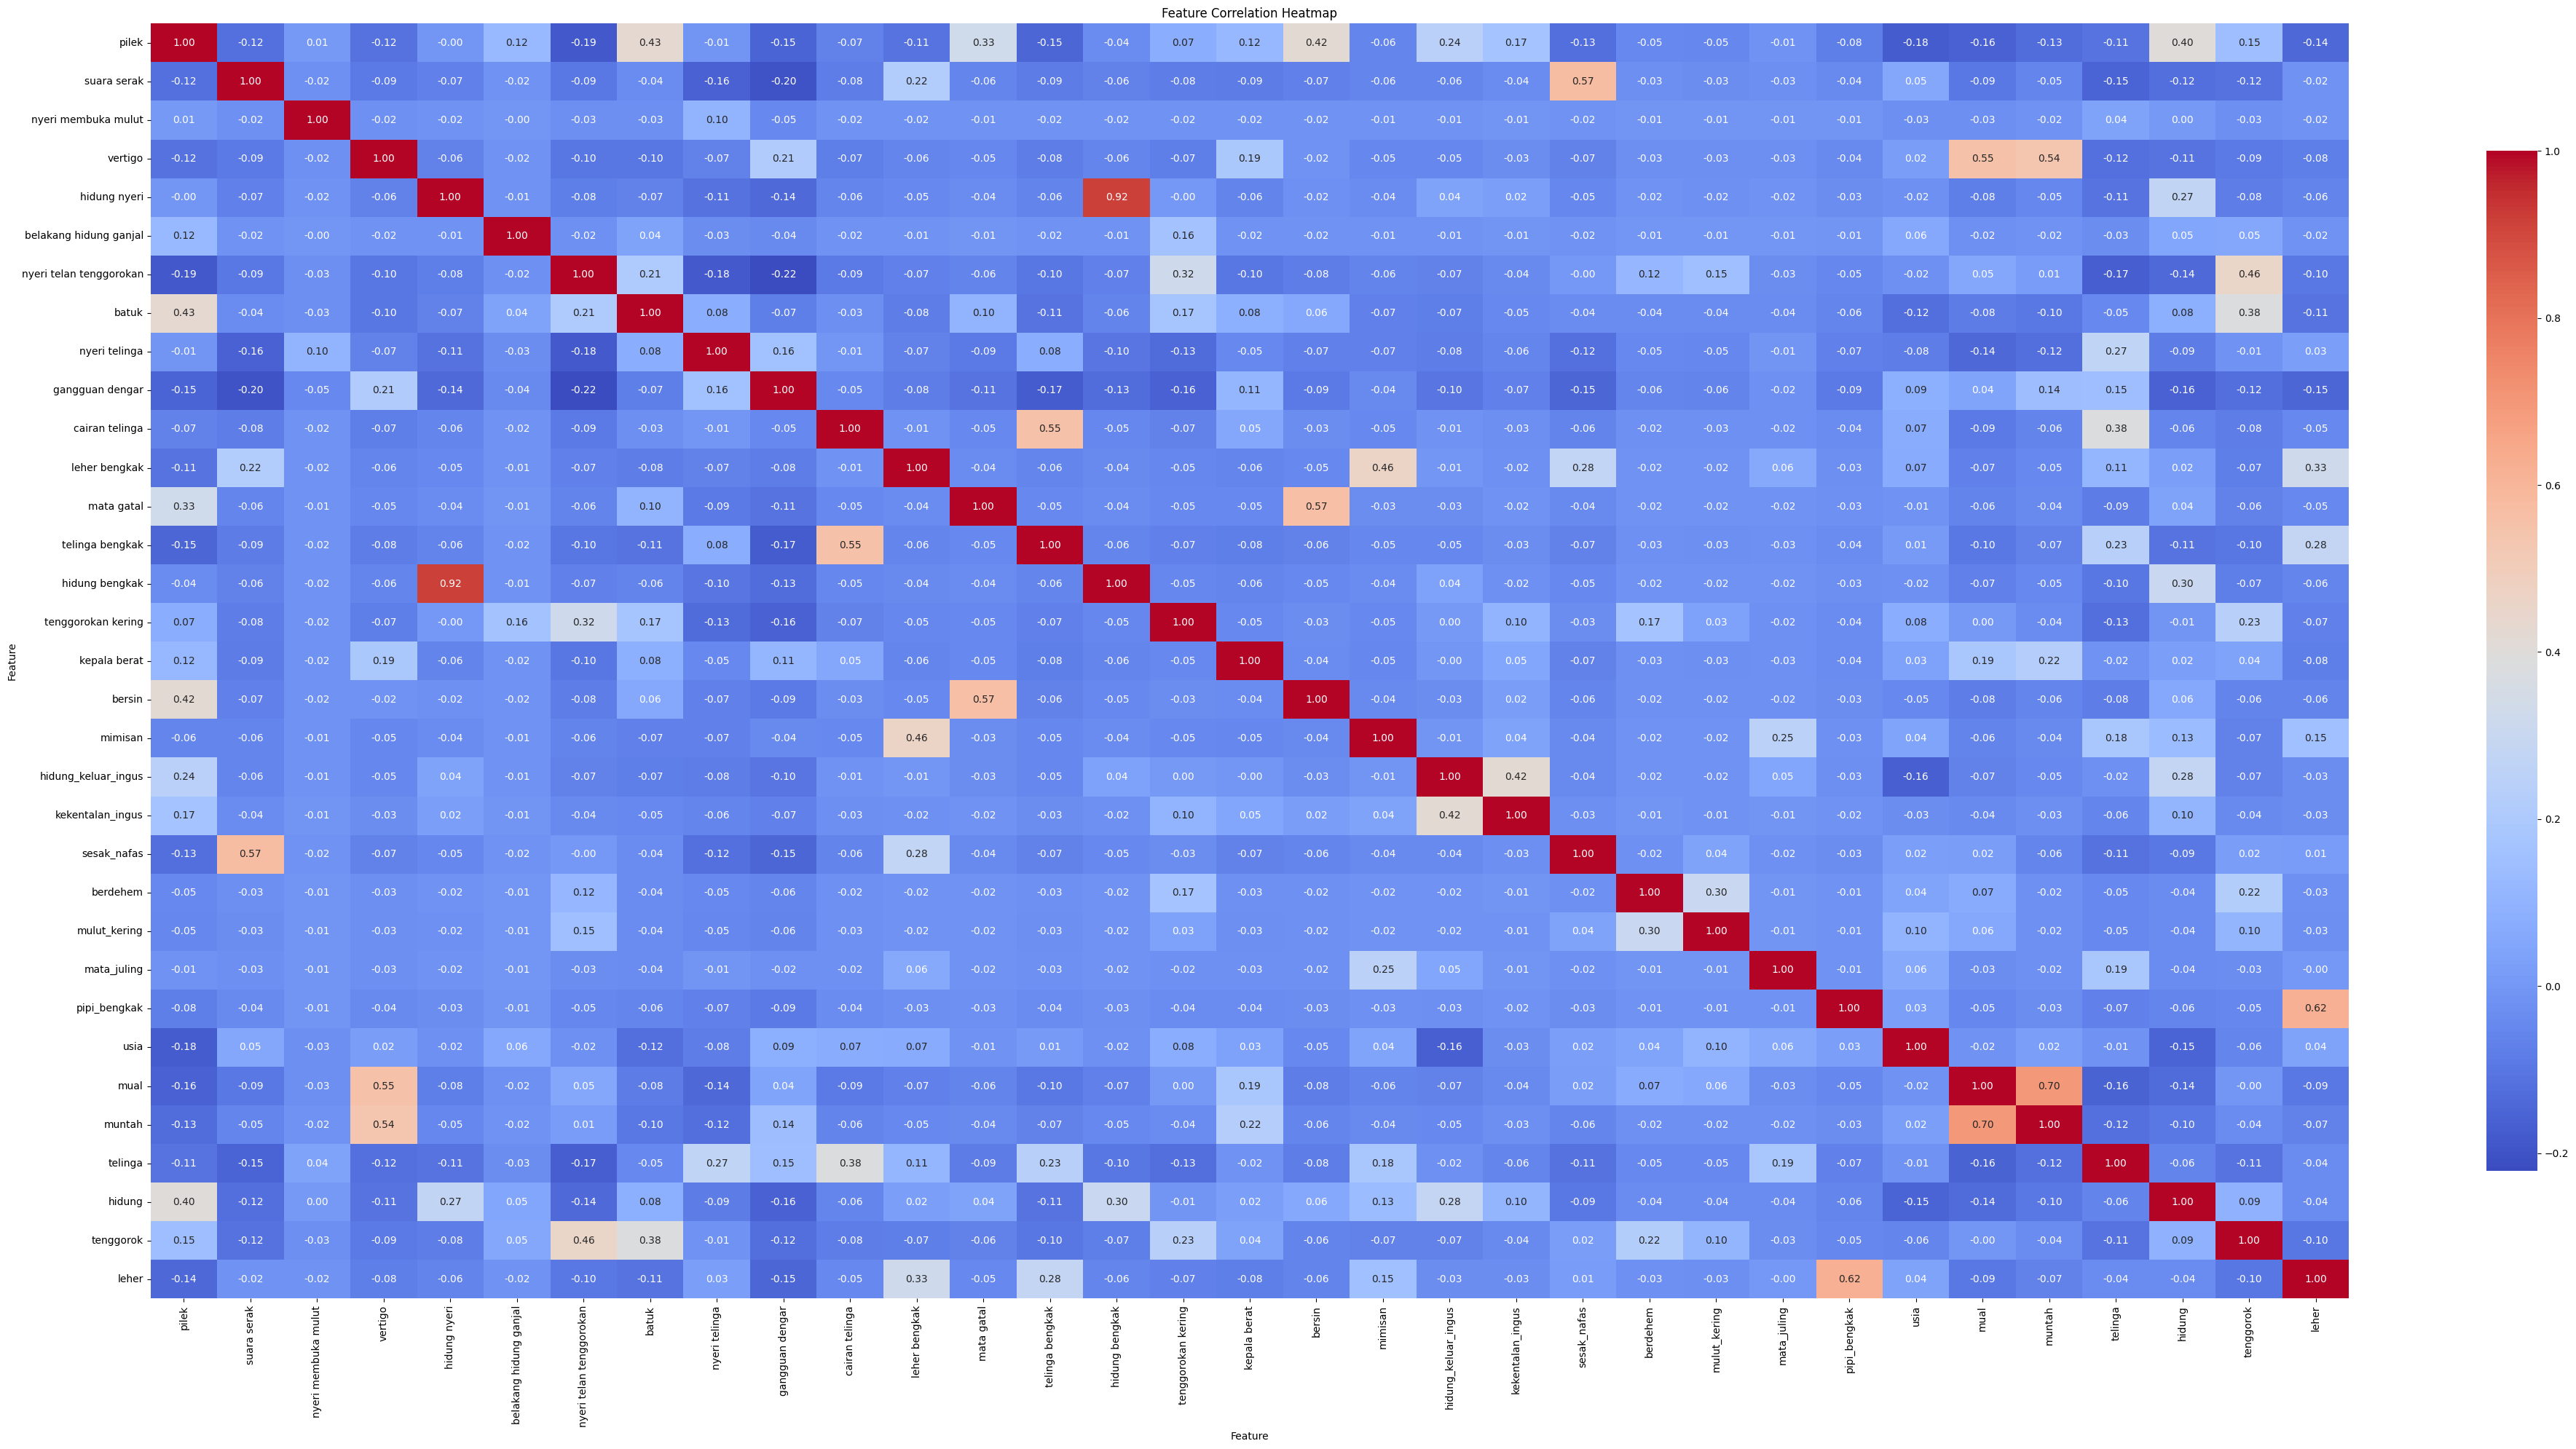

In [35]:
# Extracting feature names from the DataFrame
feature_names = vis_df.columns[:-1]  # Exclude the last column, which is the target variable

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(40, 20))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8},
            xticklabels=feature_names, yticklabels=feature_names)
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [37]:
class FeatureSelector2:
    def __init__(self, estimator, feature_importances, step=1):
        self.estimator = estimator
        self.feature_importances = feature_importances
        self.step = step

    def fit(self, X, y, method='sfs'):
        n_features = X.shape[1]

        if method == 'sfs':
            n_features_to_select = self._determine_n_features_to_select(X, y)
            selected_features = set()
            remaining_features = set(range(n_features))
            while len(selected_features) < n_features_to_select:
                best_feature = None
                best_score = -np.inf
                for feature in remaining_features:
                    current_features = list(selected_features) + [feature]
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score > best_score:
                        best_score = score
                        best_feature = feature

                if best_feature is not None:
                    selected_features.add(best_feature)
                    remaining_features.remove(best_feature)
                else:
                    break

        elif method == 'sbs':
            n_features_to_select = self._determine_n_features_to_select(X, y)
            selected_features = set(range(n_features))
            while len(selected_features) > n_features_to_select:
                worst_feature = None
                worst_score = np.inf
                for feature in selected_features:
                    current_features = list(selected_features - {feature})
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score < worst_score:
                        worst_score = score
                        worst_feature = feature

                if worst_feature is not None:
                    selected_features.remove(worst_feature)
                else:
                    break

        self.selected_features_ = list(selected_features)

    def _evaluate_subset(self, X_subset, y):
        scores = cross_val_score(self.estimator, X_subset, y, cv=5)
        return np.mean(scores)

    def _determine_n_features_to_select(self, X, y):
        feature_importance_indices = np.argsort(self.feature_importances)[::-1]
        cumulative_importance = np.cumsum(self.feature_importances[feature_importance_indices])
        threshold = 0.95 * cumulative_importance[-1]  # Select features contributing to 95% of importance
        n_features_to_select = np.argmax(cumulative_importance >= threshold) + 1
        return n_features_to_select

In [38]:
Rforest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=2, min_samples_leaf=1)
Rforest.fit(StratX_train3, Straty_train3)
Rforest.score(StratX_train3, Straty_train3)

0.9673469387755103

In [39]:
# akan memungkinkan tiap data untuk menampung nama dari data yang akan diuji satu persatu dengan tujuan untuk mengecek tiap akurasi data
filtered_df_list = []
for key, values in label_mapping.items():
    keyName = str(key)
    filtered_df = df[df['hasil_diagn_encoded'] == values]
    globals()['filtered_df_' + keyName] = filtered_df
    filtered_df_list.append('filtered_df_' + keyName)

In [40]:
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    print("Dataframe:", df_name)
    print(globals()[df_name])  # Access the dataframe using its name
    print()

Dataframe: filtered_df_barotrauma
     pilek  suara_serak  nyeri_membuka_mulut  vertigo  hidung_nyeri  \
460      0            0                    0        0             0   
461      0            0                    0        0             0   
462      0            0                    0        0             0   
463      0            0                    0        0             0   
464      0            0                    0        0             0   
465      0            0                    0        0             0   
466      0            0                    0        0             0   
467      0            0                    0        1             0   
468      0            0                    0        1             0   
469      0            0                    0        1             0   
470      0            0                    0        0             0   
471      0            0                    0        0             0   
472      0            0                    

In [41]:
XFiltered_df = []
yFiltered_df = []
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    key = str(df_name)
    # Assuming the last column is the label/target column
    globals()['X_' + key] = globals()[df_name].drop("hasil_diagn_encoded", axis = 1)  # Features
    globals()['y_' + key] = globals()[df_name]['hasil_diagn_encoded']   # Labels
    XFiltered_df.append('X_' + key)
    yFiltered_df.append('y_' + key)

In [42]:
# hasil reverse value dengan key terhadap label_mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [43]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = forest.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'meniere_disease', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'prebiakusis', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'serumen_obsturans', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'serumen_obsturans', 'barotrauma', 'barotrauma', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv']
Data : X_filtered_df_faringitis_akut
Predicted Output :  ['faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'fari

In [44]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = forest3.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'meniere_disease', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'prebiakusis', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'serumen_obsturans', 'barotrauma', 'perichondritis', 'otisis_eksterna', 'otisis_eksterna', 'barotrauma', 'serumen_obsturans', 'barotrauma', 'barotrauma', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv']
Data : X_filtered_df_faringitis_akut
Predicted Output :  ['faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'fari

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

Predicted Output :  ['prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'serumen_obsturans', 'serumen_obsturans', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis', 'prebiakusis']
Data : X_filtered_df_rhinitis_akut
Predicted Output :  ['rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_alergi', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 'rhinitis_akut', 

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

In [45]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = Stratforest.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'meniere_disease', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'prebiakusis', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv']
Data : X_filtered_df_faringitis_akut
Predicted Output :  ['faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringit

In [46]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = Stratforest3.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'meniere_disease', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'prebiakusis', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'ruptur_membran_timpani', 'barotrauma', 'barotrauma', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv']
Data : X_filtered_df_faringitis_akut
Predicted Output :  ['faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'far

In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [48]:
from sklearn.model_selection import KFold

# Assuming X contains your feature matrix and y contains your target variable

# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Define the number of folds for cross-validation
k_folds = 10

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2f}")

Cross-validation scores: [0.91428571 0.91428571 0.91428571 0.81428571 0.87142857 0.88571429
 0.78571429 0.91428571 0.81428571 0.82857143]
Mean cross-validation score: 0.87
Standard deviation of cross-validation scores: 0.05


In [61]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 300, 500],     # Number of trees in random forest
    'max_depth': [10, 20, 30, 40, 50],    # Maximum number of levels in tree
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Minimum number of samples required to split a node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=Stratforest, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)


# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Display the parameters and their corresponding scores
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 10}
Best Score: 0.8660714285714285
                                                             params  \
0    {'n_estimators': 500, 'min_samples_split': 7, 'max_depth': 40}   
1    {'n_estimators': 300, 'min_samples_split': 6, 'max_depth': 30}   
2   {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 40}   
3    {'n_estimators': 300, 'min_samples_split': 8, 'max_depth': 10}   
4    {'n_estimators': 100, 'min_samples_split': 7, 'max_depth': 20}   
5    {'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 30}   
6    {'n_estimators': 100, 'min_samples_split': 6, 'max_depth': 10}   
7    {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 50}   
8    {'n_estimators': 500, 'min_samples_split': 7, 'max_depth': 50}   
9    {'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 50}   
10   {'n_estimators': 500, 'min_samples_split': 7, 'max_depth': 20}   
11   {'n_estimators': 300, 'min_sampl

In [50]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
167 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 888}
Best Score: 0.8517857142857143


In [51]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train3, y_train3)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best Parameters: {'max_depth': 58, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 229}
Best Score: 0.8387755102040817


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Compute evaluation metrics for each class
accuracy = accuracy_score(Straty_test, y_pred)
precision = precision_score(Straty_test, y_pred, average=None)
recall = recall_score(Straty_test, y_pred, average=None)
f1 = f1_score(Straty_test, y_pred, average=None)

In [53]:
accuracy3 = accuracy_score(Straty_test3, y_pred3)
precision3 = precision_score(Straty_test3, y_pred3, average=None)
recall3 = recall_score(Straty_test3, y_pred3, average=None)
f13 = f1_score(Straty_test3, y_pred3, average=None)

In [54]:
accuracy3

0.8333333333333334

In [55]:
precision3

array([0.8       , 0.75      , 0.8       , 1.        , 1.        ,
       1.        , 1.        , 0.83333333, 0.9       , 1.        ,
       0.5       , 0.88888889, 0.72727273, 1.        , 0.69230769,
       0.8       , 1.        , 0.75      , 0.4       , 1.        ,
       0.77777778, 1.        , 1.        ])

In [56]:
recall3

array([0.44444444, 1.        , 0.88888889, 1.        , 0.77777778,
       1.        , 1.        , 0.55555556, 1.        , 1.        ,
       0.33333333, 0.88888889, 0.88888889, 1.        , 1.        ,
       0.88888889, 0.66666667, 1.        , 0.66666667, 0.4       ,
       0.77777778, 1.        , 1.        ])

In [57]:
f13

array([0.57142857, 0.85714286, 0.84210526, 1.        , 0.875     ,
       1.        , 1.        , 0.66666667, 0.94736842, 1.        ,
       0.4       , 0.88888889, 0.8       , 1.        , 0.81818182,
       0.84210526, 0.8       , 0.85714286, 0.5       , 0.57142857,
       0.77777778, 1.        , 1.        ])

In [58]:
# Print evaluation metrics
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

# Compute mean values
mean_accuracy = np.mean(accuracy3)
mean_precision = np.mean(precision3)
mean_recall = np.mean(recall3)
mean_f1_score = np.mean(f13)

# Print mean values
print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1_score)

Accuracy: 0.8333333333333334
Precision: [0.8        0.75       0.8        1.         1.         1.
 1.         0.83333333 0.9        1.         0.5        0.88888889
 0.72727273 1.         0.69230769 0.8        1.         0.75
 0.4        1.         0.77777778 1.         1.        ]
Recall: [0.44444444 1.         0.88888889 1.         0.77777778 1.
 1.         0.55555556 1.         1.         0.33333333 0.88888889
 0.88888889 1.         1.         0.88888889 0.66666667 1.
 0.66666667 0.4        0.77777778 1.         1.        ]
F1 Score: [0.57142857 0.85714286 0.84210526 1.         0.875      1.
 1.         0.66666667 0.94736842 1.         0.4        0.88888889
 0.8        1.         0.81818182 0.84210526 0.8        0.85714286
 0.5        0.57142857 0.77777778 1.         1.        ]
Mean Accuracy: 0.8333333333333334
Mean Precision: 0.8530252356339314
Mean Recall: 0.8338164251207729
Mean F1 Score: 0.8267494328707145


In [59]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.85
Precision: [1.         0.66666667 0.75       1.         1.         1.
 1.         1.         0.85714286 1.         0.5        0.83333333
 0.625      1.         0.75       0.83333333 1.         1.
 0.4        1.         1.         1.         1.        ]
Recall: [0.33333333 1.         1.         1.         0.83333333 1.
 1.         0.33333333 1.         1.         0.33333333 0.83333333
 0.83333333 1.         1.         0.83333333 1.         1.
 0.66666667 0.5        1.         1.         1.        ]
F1 Score: [0.5        0.8        0.85714286 1.         0.90909091 1.
 1.         0.5        0.92307692 1.         0.4        0.83333333
 0.71428571 1.         0.85714286 0.83333333 1.         1.
 0.5        0.66666667 1.         1.         1.        ]


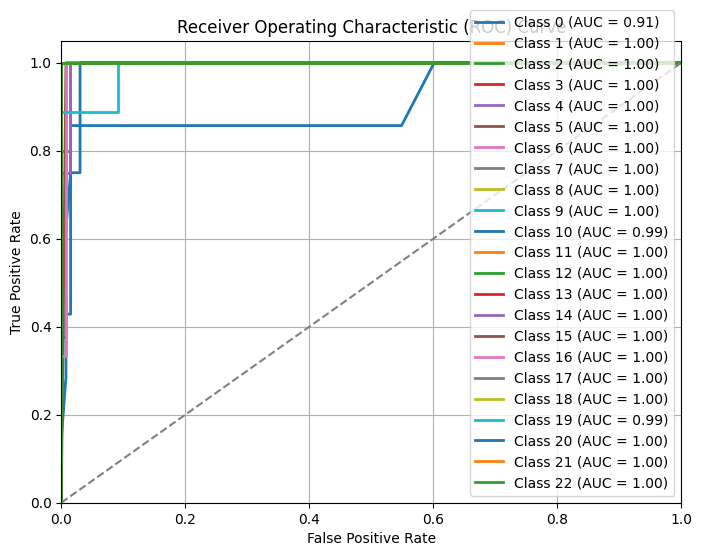

In [60]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), forest.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

